### Part 1

In [69]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn import decomposition
import numpy as np
import pandas as pd

gene_names_df = pd.read_csv("geneNames.txt", header=None)
data_df = pd.read_csv('gene_expression.csv', header=None, delimiter=";", decimal=",") 
label_df = pd.read_csv('label.csv', header=None) 


1.	Train a decision tree on subjected data. Use Python scikit-learn (this is up to you) classification tree fit it in to the data.

In [70]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data_df, label_df)

2.	Show the tree and enumerate its training accuracy.

1.0


[Text(0.5, 0.8333333333333334, 'x[4846] <= -122.744\ngini = 0.453\nsamples = 72\nvalue = [47, 25]'),
 Text(0.25, 0.5, 'x[5708] <= 128.861\ngini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[5505] <= -966.856\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]')]

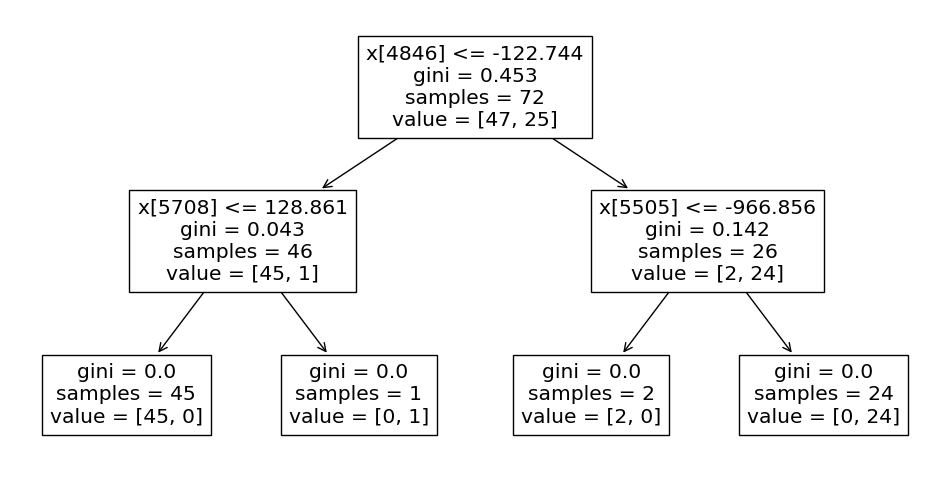

In [71]:
print(clf.score(data_df, label_df))
tree.plot_tree(clf)

3.	How would you interpret this model? Which gene is crucial for the decision?


In [72]:
print(gene_names_df.iloc[[4846]])

        0
4846  ZYX



4.	Is this gene really the one causing the cancer? Look up in the article Golub et al., 1999.
- It is not



5.	Estimate real accuracy of the tree. Use e.g., crossvalidation (alternatively, you can split the data).


In [73]:
print(cross_val_score(clf, data_df, label_df, cv=5))

[0.86666667 0.86666667 0.71428571 0.85714286 0.71428571]


6.	Compare it with the training accuracy.

- Training accuracy: 1.0
- Real accuracy (crossvalidation): cca 0.8

### Part 2



1.	Learn a basis-matrix V of the data. Use PCA method.
2.	For a range of component numbers K:

a.	project the original data X to the top K components of V. The result are data Z with reduced dimensionality.



b.	Create a tree out of these reduced data. Show it and enumerate its training accuracy.



3.	Compare all the trees resulting from the reduced data and pick the “best” according to its accuracy and structure. Follow the Occam razor.


In [79]:
# 64 components according to article (95% of variance): https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
components_n = range(1, 72, 8) 

for i in range(len(components_n)):
    pca = decomposition.PCA(n_components = components_n[i])
    pca.fit(data_df)
    transf_data = pca.transform(data_df)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(transf_data, label_df)
    print(components_n[i])
    print(np.mean(cross_val_score(clf, transf_data, label_df, cv=5)))


1
0.8447619047619048
9
0.8314285714285715
17
0.8314285714285715
25
0.8742857142857142
33
0.8171428571428573
41
0.8314285714285715
49
0.818095238095238
57
0.8180952380952382
65
0.8171428571428573



4.	Estimate the real accuracy of the “best” chosen tree. Again, by e.g. crossvalidation.


0.8314285714285715


[Text(0.5909090909090909, 0.9, 'x[1] <= 8530.626\ngini = 0.453\nsamples = 72\nvalue = [47, 25]'),
 Text(0.36363636363636365, 0.7, 'x[0] <= 30355.476\ngini = 0.183\nsamples = 49\nvalue = [44, 5]'),
 Text(0.18181818181818182, 0.5, 'x[17] <= 5957.798\ngini = 0.085\nsamples = 45\nvalue = [43, 2]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.2727272727272727, 0.3, 'x[0] <= 8478.396\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.18181818181818182, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.36363636363636365, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5454545454545454, 0.5, 'x[1] <= -23252.784\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.45454545454545453, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6363636363636364, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8181818181818182, 0.7, 'x[0] <= -19775.902\ngini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(0.7272727272727273, 0.5, '

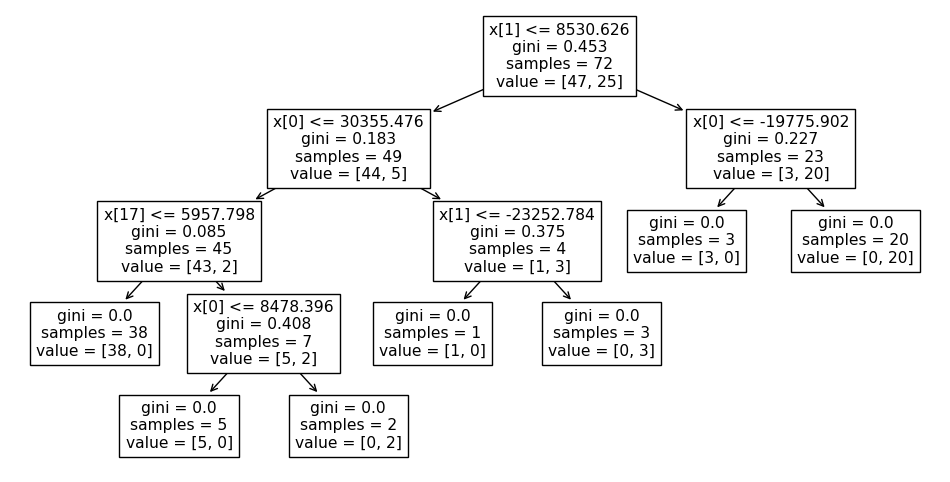

In [75]:
pca = decomposition.PCA(n_components = 25)
pca.fit(data_df)
transf_data = pca.transform(data_df)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(transf_data, label_df)
print(np.mean(cross_val_score(clf, transf_data, label_df, cv=5)))
tree.plot_tree(clf)